In [1]:
import numpy as np
import pandas as pd
import warnings

def warn(*args, **kwargs):
    pass
warnings.warn = warn

In [2]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [4]:
df = df[['v1', 'v2']]

df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


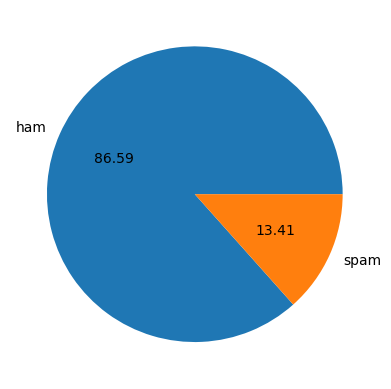

In [5]:
import matplotlib.pyplot as plt
plt.pie(df['v1'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [6]:
df.nunique()

v1       2
v2    5169
dtype: int64

In [7]:
df['v1'].value_counts()

v1
ham     4825
spam     747
Name: count, dtype: int64

In [8]:
from scipy import stats

df['v2_length'] = df['v2'].apply(len)

hams = df[df['v1'] == 'ham']['v2_length']
spams = df[df['v1'] == 'spam']['v2_length']

t_stat, p_value = stats.ttest_ind(hams, spams)


In [9]:
X = df['v2']
y = df['v1']

display(X, y)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5572, dtype: object

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: v1, Length: 5572, dtype: object

In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

display(y)

array([0, 0, 1, ..., 0, 0, 0])

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

In [13]:
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([('tfidf', TfidfVectorizer()), ('classifier', LinearSVC())])

grid_params_svm = {
    'tfidf__ngram_range': [(1,1), (1,2)],
    'tfidf__stop_words': [None, 'english'],
    'classifier__C': [0.01, 0.1, 0.5, 1.0, 1.5, 2.0, 2.5, 5.0, 10.0],
}

model_svm = GridSearchCV(pipeline, grid_params_svm, cv=5, scoring='accuracy')

model_svm.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('classifier', LinearSVC())]),
             param_grid={'classifier__C': [0.01, 0.1, 0.5, 1.0, 1.5, 2.0, 2.5,
                                           5.0, 10.0],
                         'tfidf__ngram_range': [(1, 1), (1, 2)],
                         'tfidf__stop_words': [None, 'english']},
             scoring='accuracy')

In [14]:
from sklearn.naive_bayes import MultinomialNB

pipeline = Pipeline([('tfidf', TfidfVectorizer()), ('classifier', MultinomialNB())])

grid_params_nb = {
    'tfidf__ngram_range': [(1,1), (1,2)],
    'tfidf__stop_words': [None, 'english'],
    'classifier__alpha': [0.01, 0.1, 0.5, 1.0, 1.5, 2.0, 2.5, 5.0, 10.0]
}

model_nb = GridSearchCV(pipeline, grid_params_nb, cv=5, scoring='accuracy')

model_nb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('classifier', MultinomialNB())]),
             param_grid={'classifier__alpha': [0.01, 0.1, 0.5, 1.0, 1.5, 2.0,
                                               2.5, 5.0, 10.0],
                         'tfidf__ngram_range': [(1, 1), (1, 2)],
                         'tfidf__stop_words': [None, 'english']},
             scoring='accuracy')

In [15]:
def show_metrics(y_true, y_pred, grid_search=None):
    from sklearn.metrics import (classification_report,
                                 confusion_matrix,
                                 ConfusionMatrixDisplay)

    print('-' * 20)
    print(classification_report(y_true, y_pred))
    print(confusion_matrix(y_true, y_pred))

    if grid_search:
        print('-' * 20)
        print(grid_search.best_params_)

In [16]:
best_svm = model_svm.best_estimator_
y_pred_svm = best_svm.predict(X_test)

show_metrics(y_test, y_pred_svm, model_svm)

--------------------
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1464
           1       0.97      0.93      0.95       208

    accuracy                           0.99      1672
   macro avg       0.98      0.96      0.97      1672
weighted avg       0.99      0.99      0.99      1672

[[1458    6]
 [  14  194]]
--------------------
{'classifier__C': 10.0, 'tfidf__ngram_range': (1, 2), 'tfidf__stop_words': None}


In [17]:
best_nb = model_nb.best_estimator_
y_pred_nb = best_nb.predict(X_test)

show_metrics(y_test, y_pred_nb, model_nb)

--------------------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1464
           1       0.96      0.92      0.94       208

    accuracy                           0.99      1672
   macro avg       0.97      0.96      0.97      1672
weighted avg       0.99      0.99      0.99      1672

[[1456    8]
 [  16  192]]
--------------------
{'classifier__alpha': 0.01, 'tfidf__ngram_range': (1, 2), 'tfidf__stop_words': None}
